### Energy consumption forecasting 

In [2]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [3]:
df= pd.read_excel(r"C:\Users\sambi\Downloads\Energy_Consumption.xlsx")

In [4]:
df

,Datetime,Temperature (°C),Humidity (%),Energy_Consumption (kWh)
0,2023-01-01 00:00:00,26.49,58.77,2.90
1,2023-01-01 01:00:00,24.59,56.23,3.01
2,2023-01-01 02:00:00,26.94,55.55,3.36
3,2023-01-01 03:00:00,29.57,55.92,3.19
4,2023-01-01 04:00:00,24.30,59.61,2.78
...,...,...,...,...
163,2023-01-07 19:00:00,22.54,55.51,2.60
164,2023-01-07 20:00:00,27.89,60.38,3.46
165,2023-01-07 21:00:00,26.24,56.61,3.75
166,2023-01-07 22:00:00,27.47,64.88,2.66


In [5]:
df.head()

,Datetime,Temperature (°C),Humidity (%),Energy_Consumption (kWh)
0,2023-01-01 00:00:00,26.49,58.77,2.90
1,2023-01-01 01:00:00,24.59,56.23,3.01
2,2023-01-01 02:00:00,26.94,55.55,3.36
3,2023-01-01 03:00:00,29.57,55.92,3.19
4,2023-01-01 04:00:00,24.30,59.61,2.78


In [6]:
df.dropna(inplace=True)

In [7]:
df.rename(columns={'Energy_Consumption (kWh)': 'Power_kW'}, inplace=True)

In [8]:
df['Power_kW'] = df['Power_kW'].astype(float)

In [9]:
print(df.head())

             Datetime  Temperature (°C)  Humidity (%)  Power_kW
0 2023-01-01 00:00:00             26.49         58.77      2.90
1 2023-01-01 01:00:00             24.59         56.23      3.01
2 2023-01-01 02:00:00             26.94         55.55      3.36
3 2023-01-01 03:00:00             29.57         55.92      3.19
4 2023-01-01 04:00:00             24.30         59.61      2.78


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Datetime          168 non-null    datetime64[ns]
 1   Temperature (°C)  168 non-null    float64       
 2   Humidity (%)      168 non-null    float64       
 3   Power_kW          168 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 5.4 KB
None


In [11]:
df.columns

Index(['Datetime', 'Temperature (°C)', 'Humidity (%)', 'Power_kW'], dtype='object')

In [12]:
# Convert Datetime to proper format
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
df.dropna(subset=['Datetime'], inplace=True)
df.sort_values(by='Datetime', inplace=True)

In [13]:
#Feature Engineering
df['Hour'] = df['Datetime'].dt.hour
df['Day'] = df['Datetime'].dt.day
df['Month'] = df['Datetime'].dt.month
df['Year'] = df['Datetime'].dt.year

In [14]:
#Define Features X & Target y
X = df[['Temperature (°C)', 'Humidity (%)', 'Hour', 'Day', 'Month']]
y = df['Power_kW']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = RandomForestRegressor(
    n_estimators=200, 
    random_state=42,
    max_depth=10,min_samples_split=5)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=200,
                      random_state=42)

In [17]:
y_pred = model.predict(X_test)
mae= mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test, y_pred)

In [18]:
print("\n Model Performance:")
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


 Model Performance:
MAE : 0.34170990272611873
MSE : 0.17071188186234276
RMSE: 0.4131729442525766
R2 Score: -0.3984517301303847


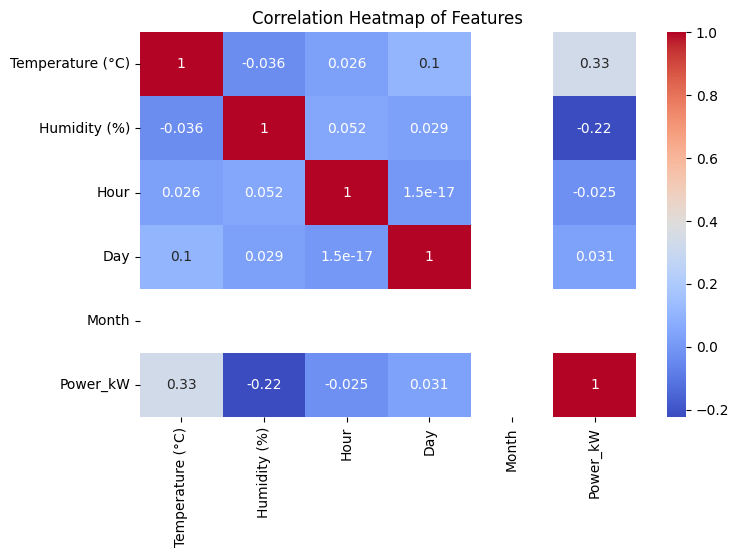

In [19]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.heatmap(df[['Temperature (°C)', 'Humidity (%)', 'Hour', 'Day', 'Month', 'Power_kW']].corr(), 
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Features")
plt.show()

the heatmap displays pearson corelation among features and the target temperature shows a moderate positive co relation with energy suggesting higher temperature increases energy usage 

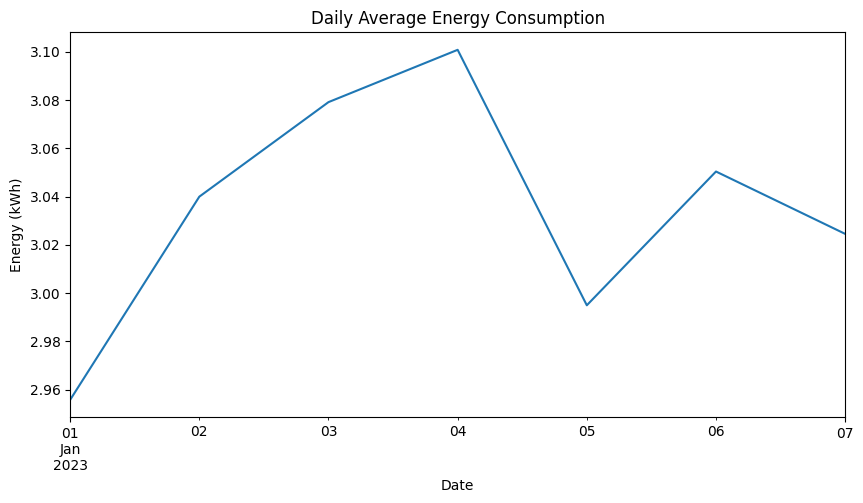

In [20]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)
df['Power_kW'].resample('D').mean().plot(figsize=(10,5))
plt.title("Daily Average Energy Consumption")
plt.ylabel("Energy (kWh)")
plt.xlabel("Date")
plt.show()

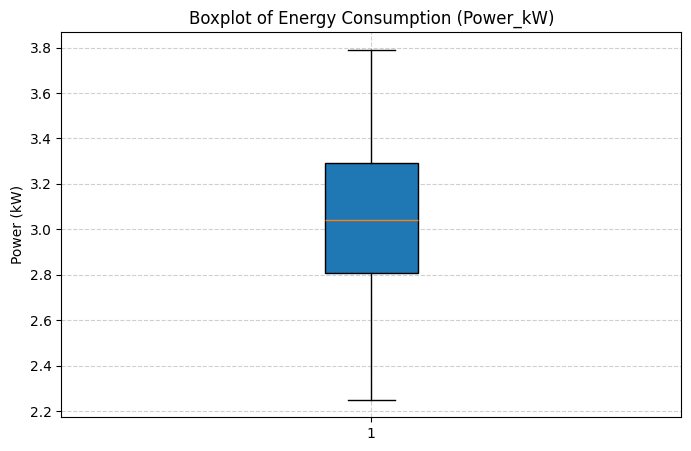

In [21]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['Power_kW'], vert=True, patch_artist=True)
plt.title("Boxplot of Energy Consumption (Power_kW)")
plt.ylabel("Power (kW)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

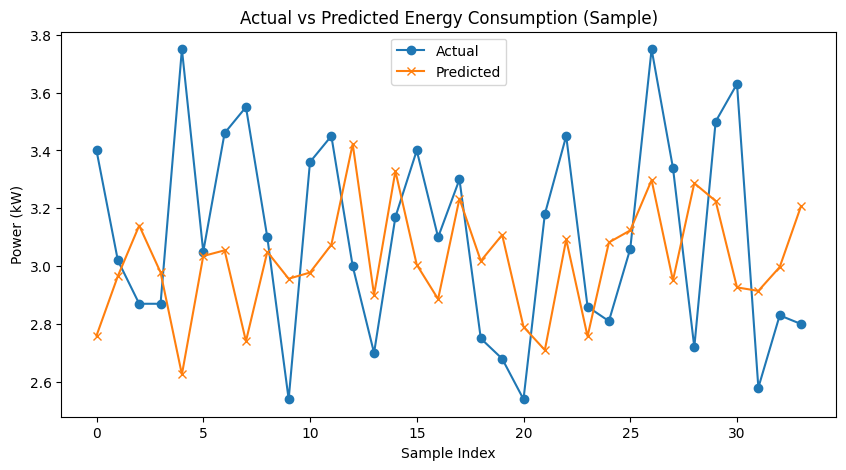

In [22]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred[:100], label='Predicted', marker='x')
plt.title("Actual vs Predicted Energy Consumption (Sample)")
plt.xlabel("Sample Index")
plt.ylabel("Power (kW)")
plt.legend()
plt.show()

# Gradio

def predict_energy(temp, humidity, Hour, Day, Month):
    input_data = pd.DataFrame([[temp, humidity, Hour, Day, Month]],
                              columns=['Temperature (°C)', 'Humidity (%)', 'Hour', 'Day', 'Month'])
    prediction = model.predict(input_data)[0]
    return f" Predicted Energy Consumption: {prediction:.2f} kWh"

demo = gr.Interface(
    fn=predict_energy,
    inputs=[
        gr.Number(label="Temperature (°C)"),
        gr.Number(label="Humidity (%)"),
        gr.Slider(0, 23, step=1, label="Hour of Day"),
        gr.Slider(1, 31, step=1, label="Day of Month"),
        gr.Slider(1, 12, step=1, label="Month (1–12)")
    ],
    outputs="text",
    title="⚡ Energy Consumption Forecasting App",
    description="Enter temperature, humidity, hour, day, and month to predict energy consumption."
)

demo.launch(debug=True)

In [27]:
rate_per_kwh = 6.5  # ₹6.5 per kWh

In [28]:
def predict_energy_and_cost(temp, humidity, Hour, Day, Month):
    input_data = pd.DataFrame([[temp, humidity, Hour, Day, Month]],
                              columns=['Temperature (°C)', 'Humidity (%)', 'Hour', 'Day', 'Month'])
    
    # Predict energy consumption
    prediction = model.predict(input_data)[0]

    # Estimate cost for that consumption
    rate_per_kwh = 6.5  # ₹ per unit (you can change this as per your local tariff)
    daily_cost = prediction * rate_per_kwh

    return (
        f" Predicted Energy Consumption: {prediction:.2f} kWh\n"
        f" Estimated Electricity Cost: ₹{daily_cost:.2f} per day"
    )


In [ ]:
demo = gr.Interface(
    fn=predict_energy_and_cost,
    inputs=[
        gr.Number(label="Temperature (°C)"),
        gr.Number(label="Humidity (%)"),
        gr.Slider(0, 23, step=1, label="Hour of Day"),
        gr.Slider(1, 31, step=1, label="Day of Month"),
        gr.Slider(1, 12, step=1, label="Month (1–12)")
    ],
    outputs="text",
    title=" Energy Consumption & Cost Estimation App",
    description="Enter temperature, humidity, hour, day, and month to predict energy consumption and estimated daily cost."
)

demo.launch(debug=True)


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
